In [443]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [444]:
#loading the dataset into a dataframe object
df=pd.read_excel('iris.xls')

In [445]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [446]:
df.shape #(rows , columns)

(150, 5)

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [448]:
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [449]:
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Each classification of Iris flower has same number of observation( =50)

#Finding the missing values

In [450]:

df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Missing values are present in SL,SW,PL columns.PW has no missing values.

In [451]:
#rows having missing values in the dataframe
df[df.isnull().any(axis=1)]

,SL,SW,PL,PW,Classification
2,NaN,3.2,1.3,0.2,Iris-setosa
10,5.4,NaN,1.5,0.2,Iris-setosa
21,NaN,3.7,1.5,0.4,Iris-setosa
27,5.2,NaN,1.5,0.2,Iris-setosa
28,5.2,3.4,NaN,0.2,Iris-setosa
39,NaN,3.4,1.5,0.2,Iris-setosa
42,4.4,3.2,NaN,0.2,Iris-setosa
43,5.0,NaN,1.6,0.6,Iris-setosa
51,NaN,3.2,4.5,1.5,Iris-versicolor
56,6.3,3.3,NaN,1.6,Iris-versicolor


#Handling the missing values

#.Hist plot
Checking the distribution of SL,SW,PL,PW using hist plot

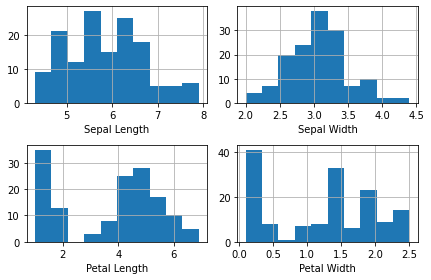

In [452]:
plt.subplot(2,2,1)
df['SL'].hist()
plt.xlabel('Sepal Length')
plt.subplot(2,2,2)
df['SW'].hist()
plt.xlabel('Sepal Width')
plt.subplot(2,2,3)
df['PL'].hist()
plt.xlabel('Petal Length')
plt.subplot(2,2,4)
df['PW'].hist()
plt.xlabel('Petal Width')
plt.tight_layout()


#From the above Hist plot we can conclude that

a)Sepal Length and Sepal Width observations is having a normal distritbution.So missing values in SL and SW can be replaced by mean or median or mode ,since for normal distribution mean=median=mode.

b)Petal Length and Petal Width have two separate bells, it's due to the measurements of Iris setosa different from the other two classifications.So missing values in PL can be replaced by median.



###Filling the missing values in SL,SW and PL using respective median values of each classification.

In [453]:
#median of SL for each Classification
print(df.groupby('Classification')['SL'].median())


Classification
Iris-setosa        5.00
Iris-versicolor    5.85
Iris-virginica     6.50
Name: SL, dtype: float64


In [454]:
#replacing missing values in "SL"
df['SL'].fillna(5,inplace=True,limit=3)#replacing missing values in SL (Iris-setosa)
df['SL'].fillna(5.85,inplace=True,limit=2)#replacing missing values in SL (Iris-versicolor)
df['SL'].fillna(6.5,inplace=True)#replacing missing values in SL (Iris-virginica)

In [455]:
df.loc[[2,21,39,51,85,106,141]]#checking the replacment of missing values

,SL,SW,PL,PW,Classification
2,5.00,3.2,1.3,0.2,Iris-setosa
21,5.00,3.7,1.5,0.4,Iris-setosa
39,5.00,3.4,1.5,0.2,Iris-setosa
51,5.85,3.2,4.5,1.5,Iris-versicolor
85,5.85,3.4,4.5,1.6,Iris-versicolor
106,6.50,2.5,4.5,1.7,Iris-virginica
141,6.50,3.1,5.1,2.3,Iris-virginica


In [456]:
#median of SW for each Classification
print(df.groupby('Classification')['SW'].median())


Classification
Iris-setosa        3.4
Iris-versicolor    2.8
Iris-virginica     3.0
Name: SW, dtype: float64


In [457]:
#replacing missing values in "Sw"
df['SW'].fillna(3.4,inplace=True,limit=3)#replacing missing values in SW (Iris-setosa)
df['SW'].fillna(2.8,inplace=True,limit=2)#replacing missing values in SW (Iris-versicolor)
df['SW'].fillna(3.0,inplace=True)#replacing missing values in SW (Iris-virginica)

In [458]:
df.loc[[10,27,43,72,98,124]]#checking the replacment of missing values

,SL,SW,PL,PW,Classification
10,5.4,3.4,1.5,0.2,Iris-setosa
27,5.2,3.4,1.5,0.2,Iris-setosa
43,5.0,3.4,1.6,0.6,Iris-setosa
72,6.3,2.8,4.9,1.5,Iris-versicolor
98,5.1,2.8,3.0,1.1,Iris-versicolor
124,6.7,3.0,5.7,2.1,Iris-virginica


In [459]:
#median of PL for each Classification
print(df.groupby('Classification')['PL'].median())

Classification
Iris-setosa        1.50
Iris-versicolor    4.35
Iris-virginica     5.55
Name: PL, dtype: float64


In [460]:
#replacing missing values in "PL"
df['PL'].fillna(1.5,inplace=True,limit=2)#replacing missing values in PL (Iris-setosa)
df['PL'].fillna(4.35,inplace=True,limit=2)#replacing missing values in PL (Iris-versicolor)
df['PL'].fillna(5.55,inplace=True)#replacing missing values in PL (Iris-virginica)

In [461]:
df.loc[[28,42,56,94,109,147]]#checking the replacment of missing values

,SL,SW,PL,PW,Classification
28,5.2,3.4,1.50,0.2,Iris-setosa
42,4.4,3.2,1.50,0.2,Iris-setosa
56,6.3,3.3,4.35,1.6,Iris-versicolor
94,5.6,2.7,4.35,1.3,Iris-versicolor
109,7.2,3.6,5.55,2.5,Iris-virginica
147,6.5,3.0,5.55,2.0,Iris-virginica


In [462]:
df.isnull().sum()#checking the missing values after filling the missing values

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#Data Visualization

#1.Pair Plot

<Figure size 1008x1008 with 0 Axes>

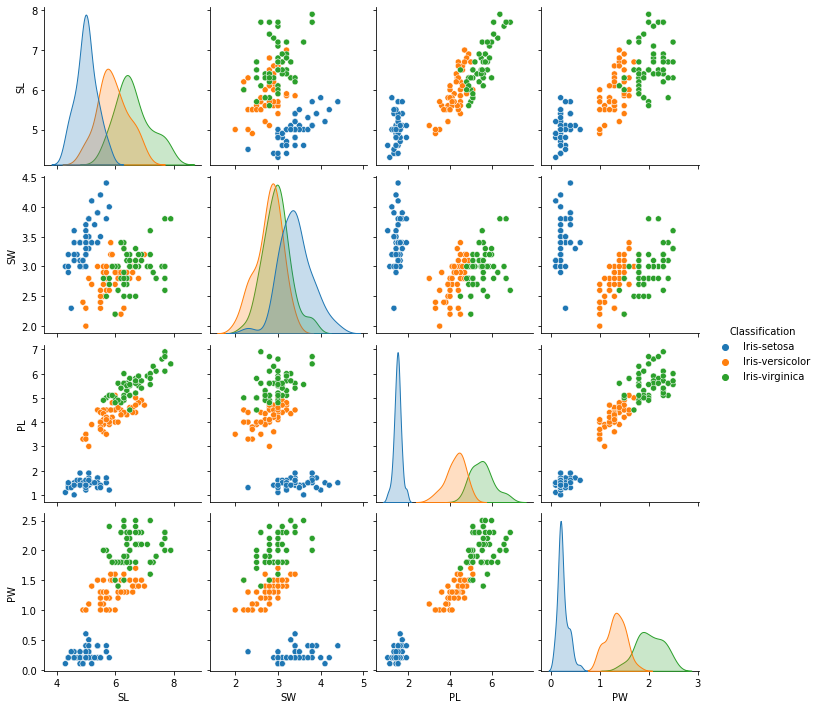

In [463]:
plt.figure(figsize=(14,14))
sns.pairplot(df, hue='Classification');

##From the above plotted graph the we can conclude that
###a)Scatter Plot inference

1.Sepal-Length vs Sepal-width:

  -Iris setosa is almost distinctable while Iris-versicolor and Iris-virginica overlaps  with each other.


2.Petal Length vs Petal Width:

 -Iris Setosa is completely separable and has least PL and PW.

###b)Distplot Inference
Looking at the frequency distribution we can conclude that :-

1.Sepal Length:

-Since all the three classification are moderately overlapping, they cannot be separated using Sepal Length.

2.Sepal Width:

-All the three classification have similar sepal width.

3.Petal Length:

-Iris Setosa has the lowest Petal length.PL can be used for distinguishing  them.

4.Petal Width:

-Iris Setosa has the lowest petal width.Pw can also be used for distinguishing them



#2.Boxplot

Outlier detection using boxplot

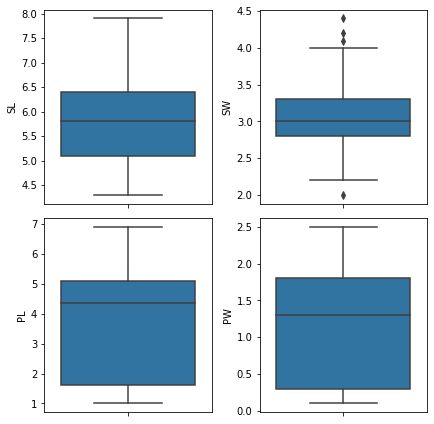

In [464]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
sns.boxplot(y=df['SL'])
plt.subplot(2,2,2)
sns.boxplot(y=df['SW'])
plt.subplot(2,2,3)
sns.boxplot(y=df['PL'])
plt.subplot(2,2,4)
sns.boxplot(y=df['PW']);
plt.tight_layout()

###From the above graph we can conclude that only SW has outlier values and SL,PL,PW has no outlier values

#Detecting Outliers(using IQR method)

In [465]:
Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')

In [466]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [467]:
IQR=Q3-Q1
print(IQR)

0.5


In [468]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(lower_limit)
print(upper_limit)

2.05
4.05


In [469]:
outlier=[]
for x in df['SW']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)


In [470]:
outlier

[4.4, 4.1, 4.2, 2.0]

In [471]:

ind1=df['SW']<lower_limit
ind2=df['SW']>upper_limit

In [472]:
df.loc[ind1]

,SL,SW,PL,PW,Classification
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [473]:

df.loc[ind2]

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa


In [474]:
df.loc[ind1].index

Int64Index([60], dtype='int64')

In [475]:
df.loc[ind2].index

Int64Index([15, 32, 33], dtype='int64')

In [476]:
df.drop([15,32,33,60],inplace=True)#dropping outliers using their respective indexes

#Checking multicollinearity between independent variables

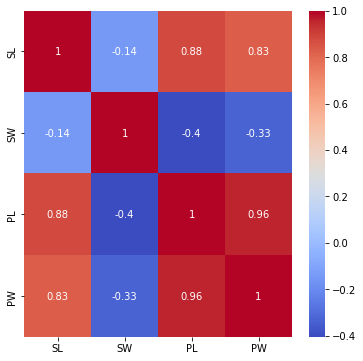

In [477]:
corr=df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap='coolwarm');

a)PL and PWhave high positive correlation of 0.96.

-If PL value increases, PW also increases.

b)SL have high positive correlation with PL and PW.

c)SW have negative correlation with PL and PW.



#Min Max Scaling

In [478]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [479]:
x=df.drop(['Classification'],axis=1)

In [480]:
z=df['Classification']

In [481]:
z.set_axis(np.arange(146),inplace=True)#setting axis of z into numbers from 0  to 145,otherwise during concating with x1 150 rows with some having nan values will be produced

In [482]:
z.shape

(146,)

In [483]:
z

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
144    Iris-virginica
145    Iris-virginica
Name: Classification, Length: 146, dtype: object

In [484]:
x1=min_max.fit_transform(x)

In [485]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [486]:
df.shape

(146, 5)

In [487]:
x1=pd.DataFrame(x1,columns=['SL', 'SW', 'PL', 'PW'])

In [488]:
x1.shape

(146, 4)

In [489]:
x1.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,0.433600,0.464231,0.475737,0.466610
std,0.229644,0.214595,0.296844,0.316819
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.444444,0.576271,0.500000
75%,0.583333,0.611111,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [490]:
x2=pd.concat([x1,z],axis=1)

In [491]:
x2.shape

(146, 5)

In [492]:
x2

,SL,SW,PL,PW,Classification
0,0.222222,0.722222,0.067797,0.041667,Iris-setosa
1,0.166667,0.444444,0.067797,0.041667,Iris-setosa
2,0.194444,0.555556,0.050847,0.041667,Iris-setosa
3,0.083333,0.500000,0.084746,0.041667,Iris-setosa
4,0.194444,0.777778,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
141,0.666667,0.444444,0.711864,0.916667,Iris-virginica
142,0.555556,0.166667,0.677966,0.750000,Iris-virginica
143,0.611111,0.444444,0.771186,0.791667,Iris-virginica
144,0.527778,0.666667,0.745763,0.916667,Iris-virginica


#Since the target is categorical (ie Classification) ,so for classifying which among the 3 classes the flower belongs we can use classification algorithms.

#1.Logistic Regression Model

In [493]:
y=x2['Classification']#target
x=x2.drop('Classification',axis=1)

In [494]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)#tarin test splitting

In [495]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()
model=lor.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [496]:
from sklearn.metrics import confusion_matrix,accuracy_score

#For classification algorithm models validation can be checked using confusion matrix,accuracy score ,precision score , and recall score 

In [497]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred))#model validation checking using confusion matrix

Confusion Matrix: 
  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [498]:
print('The Accuracy of Logistic Regression Model is:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')#model validation checking using accuracy score

The Accuracy of Logistic Regression Model is: 94.59 %


In [499]:
#printing classification report
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.95        37
      macro avg       0.93      0.93      0.93        37
   weighted avg       0.95      0.95      0.95        37



#2.K-NN Model

In [500]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k= []#empty list for appending accuracy of model for each k values
neighbors = np.arange(3, 15)#k value from 3 to 14

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model2=knn.fit(x_train,y_train)
  y_pred_knn=model2.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)#appending accuracy of model for each k values

In [501]:
metric_k

[0.9459459459459459,
 0.972972972972973,
 1.0,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973]

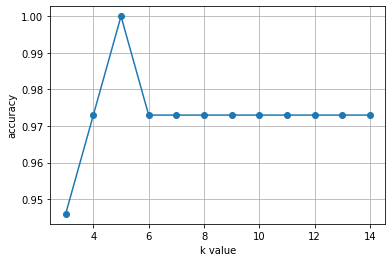

In [502]:
#Ploting line graph of accuracy of model for each value of k 
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [522]:

#accuracy is max for  k =5values,so creating model using k=5
knn=KNeighborsClassifier(n_neighbors=5)
model2=knn.fit(x_train,y_train)
y_pred_knn=model2.predict(x_test)

In [523]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_knn))

Confusion Matrix: 
  [[16  0  0]
 [ 0  8  0]
 [ 0  0 13]]


In [524]:
print('The Accuracy of K-NN Model is:',np.round(accuracy_score(y_test,y_pred_knn)*100,2),'%')

The Accuracy of K-NN Model is: 100.0 %


#3.Support Vector Machine(SVM) Model

In [506]:
from sklearn.svm import SVC#support vector classifier

#3a.SVM kernel=rbf

In [507]:
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_model.predict(x_test)

In [508]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_svm))

Confusion Matrix: 
  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [509]:
print('The Accuracy of SVM Model(kernel=rbf) is:',np.round(accuracy_score(y_test,y_pred_svm)*100,2),'%')

The Accuracy of SVM Model(kernel=rbf) is: 94.59 %


#3b.SVM kernel=linear

In [510]:
svm_clf_linear=SVC(kernel='linear')
svm_model_linear=svm_clf.fit(x_train,y_train)
y_pred_svm_linear=svm_model_linear.predict(x_test)

In [511]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_svm_linear))

Confusion Matrix: 
  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [512]:
print('The Accuracy of SVM Model(kernel=linear) is:',np.round(accuracy_score(y_test,y_pred_svm_linear)*100,2),'%')

The Accuracy of SVM Model(kernel=linear) is: 94.59 %


#3c.SVM kernel=poly

In [513]:
svm_clf_linear=SVC(kernel='poly',degree=3)
svm_model_poly=svm_clf.fit(x_train,y_train)
y_pred_svm_poly=svm_model_poly.predict(x_test)

In [514]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_svm_poly))

Confusion Matrix: 
  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [515]:
print('The Accuracy of SVM Model(kernel=poly) is:',np.round(accuracy_score(y_test,y_pred_svm_poly)*100,2),'%')

The Accuracy of SVM Model(kernel=poly) is: 94.59 %


#4.#Decision Tree Model

In [516]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=42)
dt_model=dt_clf.fit(x_train,y_train)
y_pred_deci=dt_model.predict(x_test)

In [517]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_deci))

Confusion Matrix: 
  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [518]:
print('The Accuracy of Decision Tree Model is:',np.round(accuracy_score(y_test,y_pred_deci)*100,2),'%')

The Accuracy of Decision Tree Model is: 94.59 %


#5.Random Forest Model

In [519]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(random_state=42)
rf_model=rf_clf.fit(x_train,y_train)
y_pred_rand=rf_model.predict(x_test)

In [520]:
print('Confusion Matrix: \n ',confusion_matrix(y_test,y_pred_rand))

Confusion Matrix: 
  [[16  0  0]
 [ 0  7  1]
 [ 0  1 12]]


In [521]:
print('The Accuracy of Random Forest Model is:',np.round(accuracy_score(y_test,y_pred_rand)*100,2),'%')

The Accuracy of Random Forest Model is: 94.59 %


#Accuracy Comparison between different Classification models on Iris Dataset

In [525]:
print('The Accuracy of Logistic Regression Model is:',np.round(accuracy_score(y_test,y_pred)*100,2),'%')
print('The Accuracy of K-NN Model is:',np.round(accuracy_score(y_test,y_pred_knn)*100,2),'%')
print('The Accuracy of SVM Model(kernel=rbf) is:',np.round(accuracy_score(y_test,y_pred_svm)*100,2),'%')
print('The Accuracy of SVM Model(kernel=linear) is:',np.round(accuracy_score(y_test,y_pred_svm_linear)*100,2),'%')
print('The Accuracy of SVM Model(kernel=poly) is:',np.round(accuracy_score(y_test,y_pred_svm_poly)*100,2),'%')
print('The Accuracy of Decision Tree Model is:',np.round(accuracy_score(y_test,y_pred_deci)*100,2),'%')
print('The Accuracy of Random Forest Model is:',np.round(accuracy_score(y_test,y_pred_rand)*100,2),'%')


The Accuracy of Logistic Regression Model is: 94.59 %
The Accuracy of K-NN Model is: 100.0 %
The Accuracy of SVM Model(kernel=rbf) is: 94.59 %
The Accuracy of SVM Model(kernel=linear) is: 94.59 %
The Accuracy of SVM Model(kernel=poly) is: 94.59 %
The Accuracy of Decision Tree Model is: 94.59 %
The Accuracy of Random Forest Model is: 94.59 %


##Accuracy is highest for KNN model (with k=5 ) having an accuracy score of 100%,and all other models have same accuracy value of 94.59%.